# 🤖 Modelos de Regresión - World Happiness Report

Este notebook implementa **3 modelos de Machine Learning** para predecir el Happiness Score utilizando datos de 2015-2019.

## Modelos:
1. **Regresión Lineal Múltiple**: Modelo interpretable que captura relaciones lineales
2. **Random Forest Regressor**: Ensemble de árboles de decisión, robusto a outliers
3. **Gradient Boosting Regressor**: Modelo de boosting secuencial, alta precisión

## Métricas de Evaluación:
- **R² (Coefficient of Determination)**: Proporción de varianza explicada
- **MAE (Mean Absolute Error)**: Error promedio absoluto
- **RMSE (Root Mean Squared Error)**: Raíz del error cuadrático medio
- **MAPE (Mean Absolute Percentage Error)**: Error porcentual promedio

## División de Datos:
- **70% Entrenamiento** - **30% Prueba**

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

---
## 📊 1. Carga y Preparación de Datos

In [ ]:
# Cargar datos combinados generados por el ETL
import os

# Verificar si existe el archivo combinado
combined_path = '../data/combined_data.csv'

if not os.path.exists(combined_path):
    print("⚠️  No se encontró combined_data.csv")
    print("🔄 Ejecuta primero: python etl.py")
    print("📌 O ejecuta el notebook desde la raíz del proyecto")
else:
    # Cargar el archivo combinado directamente
    df = pd.read_csv(combined_path)
    
    print(f"\n✅ Datos combinados cargados desde: {combined_path}")
    print(f"\nDimensiones totales: {df.shape}")
    print(f"\nRegistros por año:")
    print(df['Year'].value_counts().sort_index())
    print(f"\nColumnas disponibles:")
    print(df.columns.tolist())
    print(f"\nPrimeras filas:")
    display(df.head(10))



✅ Datasets cargados:
   2015: 158 registros
   2016: 157 registros
   2017: 155 registros
   2018: 156 registros
   2019: 156 registros

Dimensiones totales: (782, 9)
Registros por año:
Year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: count, dtype: int64

Columnas disponibles:
['Country', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']

Primeras filas:


,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015
6,Netherlands,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2015
7,Sweden,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2015
8,New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015
9,Australia,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2015


In [13]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")


Valores nulos por columna:
Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Year                            0
dtype: int64

Total de valores nulos: 1


In [14]:
# Preparar datos para modelado
# Variable objetivo (y): Score
# Variables predictoras (X): GDP per capita, Social support, etc.

# Seleccionar features y target
feature_columns = ['GDP per capita', 'Social support', 'Healthy life expectancy', 
                   'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Verificar y limpiar datos nulos antes de dividir
print("Valores nulos antes de limpiar:")
print(df[feature_columns + ['Score']].isnull().sum())

# Eliminar filas con valores nulos en las columnas importantes
df_limpio = df.dropna(subset=feature_columns + ['Score'])

print(f"\nRegistros después de limpiar: {len(df_limpio)} (eliminados: {len(df) - len(df_limpio)})")

X = df_limpio[feature_columns]
y = df_limpio['Score']


print(f"\nVariables predictoras (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nDistribución por año en datos limpios:")
print(df_limpio['Year'].value_counts().sort_index())
print(f"\nFeatures utilizadas:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

Valores nulos antes de limpiar:
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
Score                           0
dtype: int64

Registros después de limpiar: 781 (eliminados: 1)

Variables predictoras (X): (781, 6)
Variable objetivo (y): (781,)

Distribución por año en datos limpios:
Year
2015    158
2016    157
2017    155
2018    155
2019    156
Name: count, dtype: int64

Features utilizadas:
  1. GDP per capita
  2. Social support
  3. Healthy life expectancy
  4. Freedom to make life choices
  5. Generosity
  6. Perceptions of corruption


In [15]:
# Estadísticas de las variables
print("\nEstadísticas de las variables predictoras:")
X.describe()


Estadísticas de las variables predictoras:


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436
std,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000
50%,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000
75%,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030
max,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910


In [16]:
# Dividir datos en conjunto de entrenamiento y prueba (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("="*80)
print("DIVISIÓN DE DATOS (70% ENTRENAMIENTO - 30% PRUEBA)")
print("="*80)
print(f"\nConjunto de entrenamiento:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"\nConjunto de prueba:")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")
print(f"\nPorcentaje de datos de entrenamiento: {len(X_train)/len(X)*100:.1f}%")
print(f"Porcentaje de datos de prueba: {len(X_test)/len(X)*100:.1f}%")

DIVISIÓN DE DATOS (70% ENTRENAMIENTO - 30% PRUEBA)

Conjunto de entrenamiento:
  X_train: (546, 6)
  y_train: (546,)

Conjunto de prueba:
  X_test: (235, 6)
  y_test: (235,)

Porcentaje de datos de entrenamiento: 69.9%
Porcentaje de datos de prueba: 30.1%


---
## 🎯 2. Funciones de Evaluación

In [17]:
def calcular_metricas(y_true, y_pred, nombre_modelo):
    """
    Calcula métricas de evaluación para modelos de regresión
    """
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{'='*80}")
    print(f"MÉTRICAS DE EVALUACIÓN - {nombre_modelo}")
    print(f"{'='*80}")
    print(f"R² (Coefficient of Determination):    {r2:.4f}")
    print(f"MAE (Mean Absolute Error):            {mae:.4f}")
    print(f"MSE (Mean Squared Error):             {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error):       {rmse:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    
    return {
        'R2': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

def graficar_predicciones(y_true, y_pred, nombre_modelo):
    """
    Crea visualizaciones de las predicciones vs valores reales
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Predicciones vs Valores Reales
    axes[0].scatter(y_true, y_pred, alpha=0.6, s=100, edgecolors='black', linewidth=1)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 
                 'r--', lw=3, label='Predicción Perfecta')
    axes[0].set_xlabel('Valores Reales', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Predicciones', fontsize=12, fontweight='bold')
    axes[0].set_title(f'{nombre_modelo}\nPredicciones vs Valores Reales', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Gráfico 2: Residuales
    residuals = y_true - y_pred
    axes[1].scatter(y_pred, residuals, alpha=0.6, s=100, edgecolors='black', linewidth=1)
    axes[1].axhline(y=0, color='r', linestyle='--', lw=3, label='Residual = 0')
    axes[1].set_xlabel('Predicciones', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Residuales', fontsize=12, fontweight='bold')
    axes[1].set_title(f'{nombre_modelo}\nGráfico de Residuales', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("Funciones de evaluación definidas")

Funciones de evaluación definidas


---
## 📈 3. Modelo: Regresión Lineal Múltiple

In [18]:
# Crear y entrenar el modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

print("\n✅ Modelo de Regresión Lineal entrenado exitosamente")
print(f"\nIntercept (β₀): {modelo_lr.intercept_:.4f}")


✅ Modelo de Regresión Lineal entrenado exitosamente

Intercept (β₀): 2.1799



COEFICIENTES DEL MODELO:
                     Feature  Coeficiente
Freedom to make life choices     1.614804
              GDP per capita     1.065962
     Healthy life expectancy     1.060623
   Perceptions of corruption     0.966367
              Social support     0.630179
                  Generosity     0.561096

Intercept (β₀): 2.1799


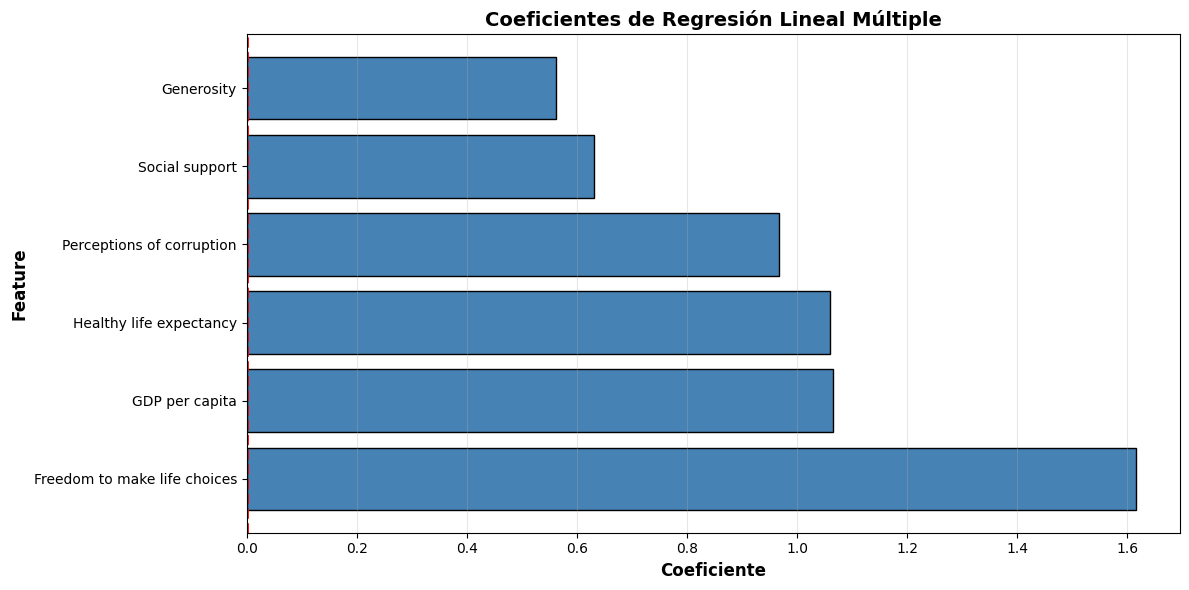

In [19]:
# Ver coeficientes del modelo
print("\nCOEFICIENTES DEL MODELO:")
coef_df = pd.DataFrame({
    'Feature': feature_columns,
    'Coeficiente': modelo_lr.coef_
}).sort_values('Coeficiente', ascending=False)

print(coef_df.to_string(index=False))
print(f"\nIntercept (β₀): {modelo_lr.intercept_:.4f}")

# Visualizar coeficientes
plt.figure(figsize=(12, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'], color='steelblue', edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Coeficientes de Regresión Lineal Múltiple', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.tight_layout()
plt.show()

In [20]:
# Hacer predicciones
y_pred_train_lr = modelo_lr.predict(X_train)
y_pred_test_lr = modelo_lr.predict(X_test)

# Calcular métricas para conjunto de entrenamiento
print("RESULTADOS EN CONJUNTO DE ENTRENAMIENTO")
metricas_train_lr = calcular_metricas(y_train, y_pred_train_lr, "Regresión Lineal (Train)")

# Calcular métricas para conjunto de prueba
print("RESULTADOS EN CONJUNTO DE PRUEBA")
metricas_test_lr = calcular_metricas(y_test, y_pred_test_lr, "Regresión Lineal (Test)")

RESULTADOS EN CONJUNTO DE ENTRENAMIENTO

MÉTRICAS DE EVALUACIÓN - Regresión Lineal (Train)
R² (Coefficient of Determination):    0.7675
MAE (Mean Absolute Error):            0.4225
MSE (Mean Squared Error):             0.2968
RMSE (Root Mean Squared Error):       0.5448
MAPE (Mean Absolute Percentage Error): 8.37%
RESULTADOS EN CONJUNTO DE PRUEBA

MÉTRICAS DE EVALUACIÓN - Regresión Lineal (Test)
R² (Coefficient of Determination):    0.7519
MAE (Mean Absolute Error):            0.4321
MSE (Mean Squared Error):             0.3098
RMSE (Root Mean Squared Error):       0.5566
MAPE (Mean Absolute Percentage Error): 8.68%


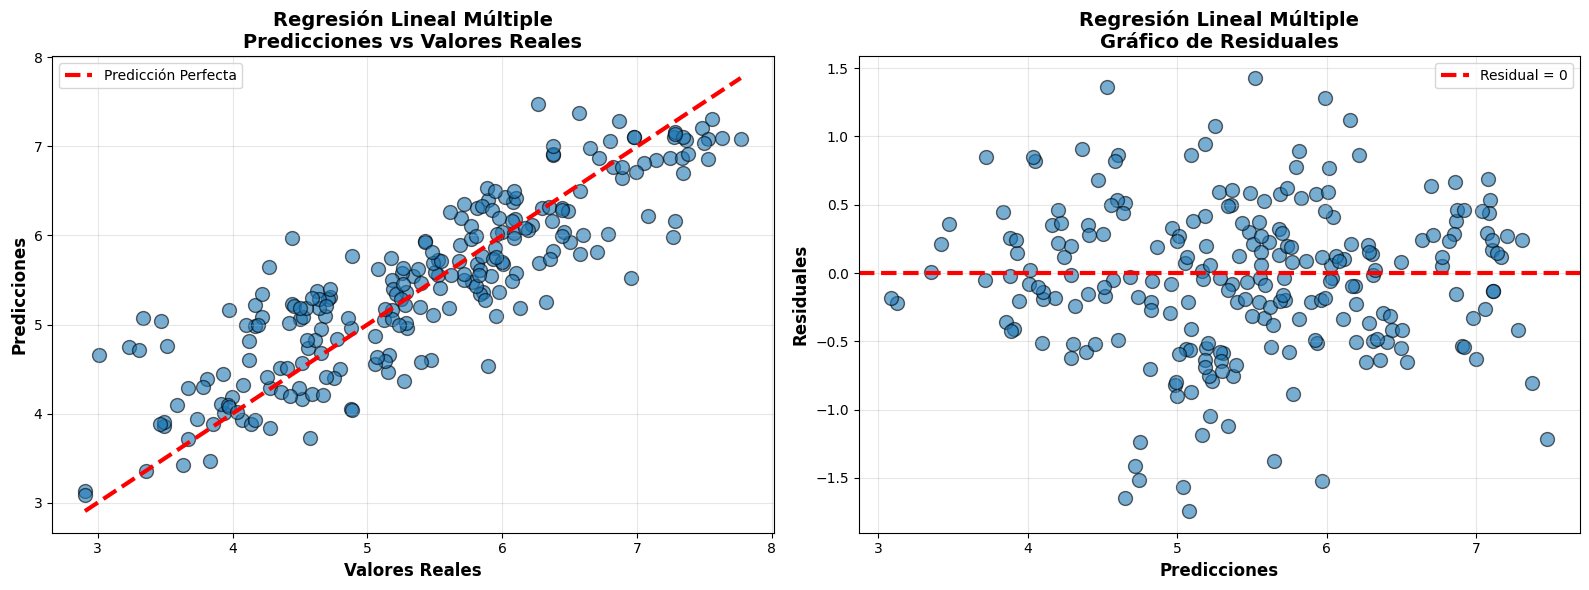

In [21]:
# Visualizar predicciones
graficar_predicciones(y_test, y_pred_test_lr, "Regresión Lineal Múltiple")

In [22]:
# Cross-Validation
cv_scores_lr = cross_val_score(modelo_lr, X, y, cv=5, scoring='r2')

print("\n" + "="*80)
print("VALIDACIÓN CRUZADA (5-FOLD)")
print("="*80)
print(f"\nR² scores por fold: {cv_scores_lr}")
print(f"R² promedio: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std() * 2:.4f})")


VALIDACIÓN CRUZADA (5-FOLD)

R² scores por fold: [0.74482507 0.62247672 0.76654563 0.78123223 0.75429586]
R² promedio: 0.7339 (+/- 0.1140)


---
## 🌲 4. Modelo: Random Forest Regressor

In [23]:
# Crear y entrenar Random Forest
modelo_rf = RandomForestRegressor(
    n_estimators=200,        # Número de árboles
    max_depth=15,            # Profundidad máxima
    min_samples_split=5,     # Mínimo de muestras para dividir
    min_samples_leaf=2,      # Mínimo de muestras en hoja
    random_state=42,
    n_jobs=-1                # Usar todos los cores
)

modelo_rf.fit(X_train, y_train)

print("\n✅ Modelo Random Forest entrenado exitosamente")
print(f"\nParámetros del modelo:")
print(f"  - Número de árboles: {modelo_rf.n_estimators}")
print(f"  - Profundidad máxima: {modelo_rf.max_depth}")
print(f"  - Min samples split: {modelo_rf.min_samples_split}")
print(f"  - Min samples leaf: {modelo_rf.min_samples_leaf}")


✅ Modelo Random Forest entrenado exitosamente

Parámetros del modelo:
  - Número de árboles: 200
  - Profundidad máxima: 15
  - Min samples split: 5
  - Min samples leaf: 2



IMPORTANCIA DE FEATURES (Random Forest):
                     Feature  Importancia
     Healthy life expectancy     0.379827
              GDP per capita     0.358615
Freedom to make life choices     0.110614
              Social support     0.067123
   Perceptions of corruption     0.042653
                  Generosity     0.041169


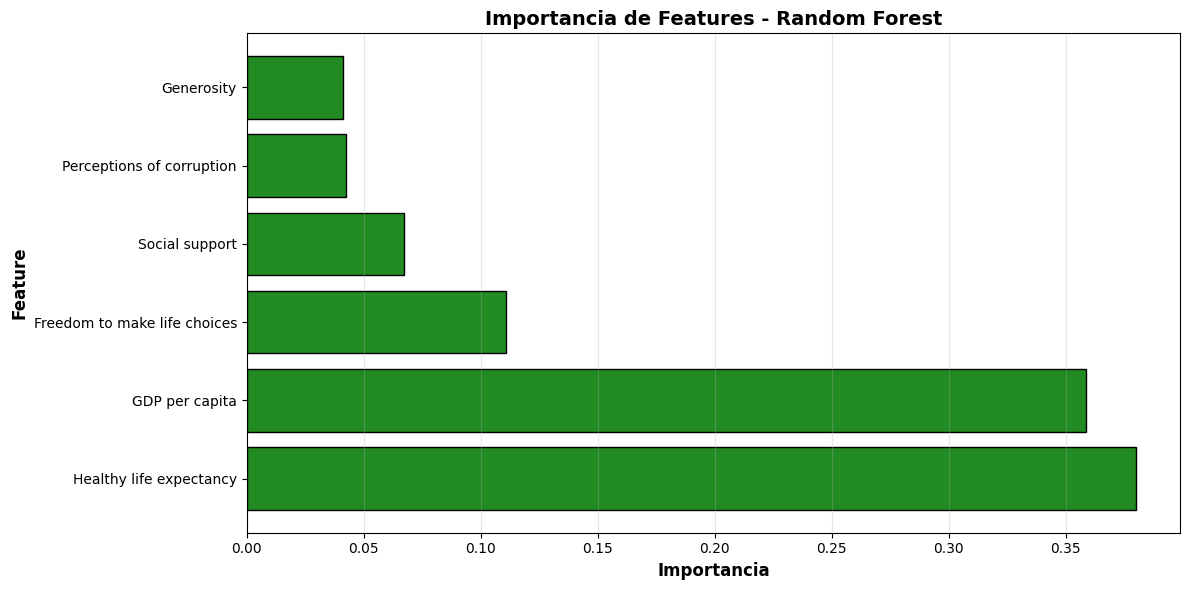

In [24]:
# Importancia de features en Random Forest
importancias_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nIMPORTANCIA DE FEATURES (Random Forest):")
print(importancias_rf.to_string(index=False))

# Visualizar importancias
plt.figure(figsize=(12, 6))
plt.barh(importancias_rf['Feature'], importancias_rf['Importancia'], 
         color='forestgreen', edgecolor='black')
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Importancia de Features - Random Forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [25]:
# Hacer predicciones con Random Forest
y_pred_train_rf = modelo_rf.predict(X_train)
y_pred_test_rf = modelo_rf.predict(X_test)

# Calcular métricas para conjunto de entrenamiento
print("RESULTADOS EN CONJUNTO DE ENTRENAMIENTO")
metricas_train_rf = calcular_metricas(y_train, y_pred_train_rf, "Random Forest (Train)")

# Calcular métricas para conjunto de prueba
print("RESULTADOS EN CONJUNTO DE PRUEBA")
metricas_test_rf = calcular_metricas(y_test, y_pred_test_rf, "Random Forest (Test)")

RESULTADOS EN CONJUNTO DE ENTRENAMIENTO

MÉTRICAS DE EVALUACIÓN - Random Forest (Train)
R² (Coefficient of Determination):    0.9549
MAE (Mean Absolute Error):            0.1787
MSE (Mean Squared Error):             0.0576
RMSE (Root Mean Squared Error):       0.2401
MAPE (Mean Absolute Percentage Error): 3.55%
RESULTADOS EN CONJUNTO DE PRUEBA

MÉTRICAS DE EVALUACIÓN - Random Forest (Test)
R² (Coefficient of Determination):    0.8058
MAE (Mean Absolute Error):            0.3850
MSE (Mean Squared Error):             0.2426
RMSE (Root Mean Squared Error):       0.4925
MAPE (Mean Absolute Percentage Error): 7.76%


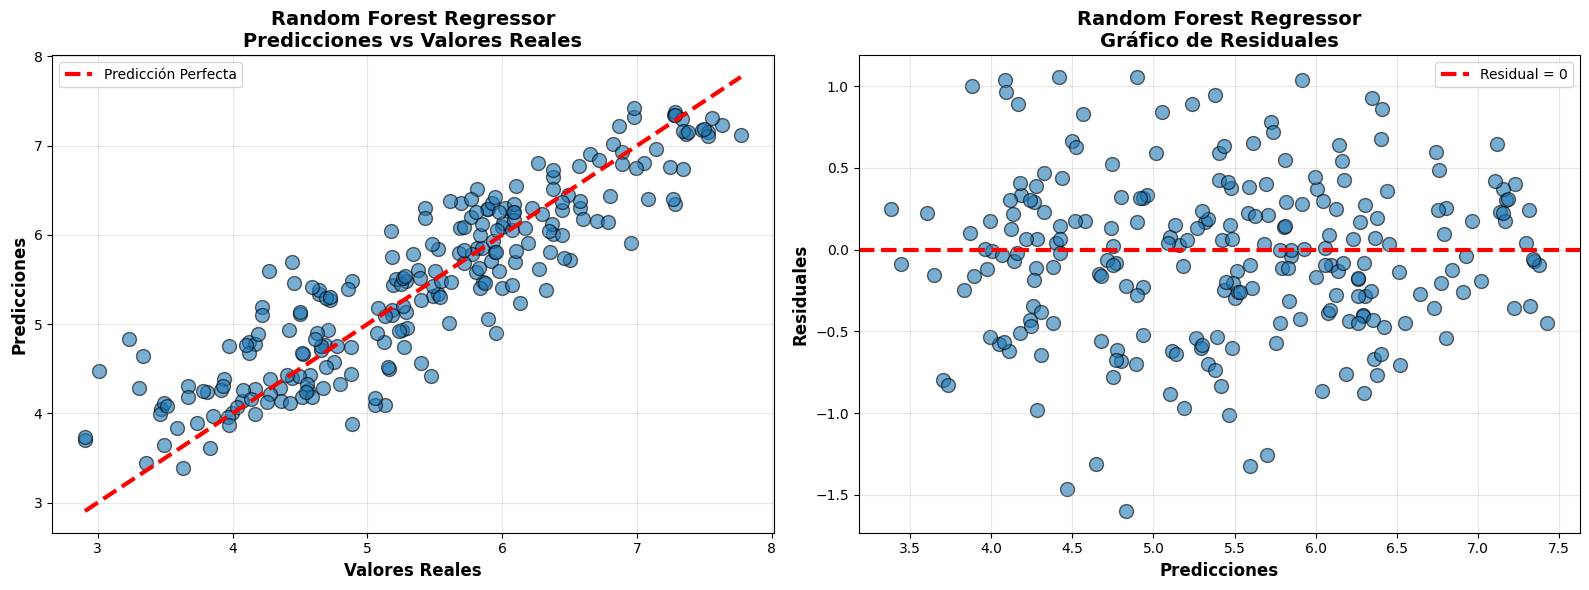

In [26]:
# Visualizar predicciones Random Forest
graficar_predicciones(y_test, y_pred_test_rf, "Random Forest Regressor")

In [27]:
# Cross-Validation Random Forest
cv_scores_rf = cross_val_score(modelo_rf, X, y, cv=5, scoring='r2')

print("\n" + "="*80)
print("VALIDACIÓN CRUZADA (5-FOLD) - Random Forest")
print("="*80)
print(f"\nR² scores por fold: {cv_scores_rf}")
print(f"R² promedio: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")


VALIDACIÓN CRUZADA (5-FOLD) - Random Forest

R² scores por fold: [0.77580226 0.70682996 0.84242388 0.8608509  0.70312542]
R² promedio: 0.7778 (+/- 0.1317)


---
## 🚀 5. Modelo: Gradient Boosting Regressor

In [28]:
# Crear y entrenar Gradient Boosting
modelo_gb = GradientBoostingRegressor(
    n_estimators=200,        # Número de árboles
    learning_rate=0.1,       # Tasa de aprendizaje
    max_depth=5,             # Profundidad máxima
    min_samples_split=5,     # Mínimo de muestras para dividir
    min_samples_leaf=2,      # Mínimo de muestras en hoja
    subsample=0.8,           # Fracción de muestras para entrenar cada árbol
    random_state=42
)

modelo_gb.fit(X_train, y_train)

print("\n✅ Modelo Gradient Boosting entrenado exitosamente")
print(f"\nParámetros del modelo:")
print(f"  - Número de árboles: {modelo_gb.n_estimators}")
print(f"  - Learning rate: {modelo_gb.learning_rate}")
print(f"  - Profundidad máxima: {modelo_gb.max_depth}")
print(f"  - Subsample: {modelo_gb.subsample}")


✅ Modelo Gradient Boosting entrenado exitosamente

Parámetros del modelo:
  - Número de árboles: 200
  - Learning rate: 0.1
  - Profundidad máxima: 5
  - Subsample: 0.8



IMPORTANCIA DE FEATURES (Gradient Boosting):
                     Feature  Importancia
     Healthy life expectancy     0.385583
              GDP per capita     0.305722
Freedom to make life choices     0.118670
              Social support     0.081654
   Perceptions of corruption     0.054419
                  Generosity     0.053953


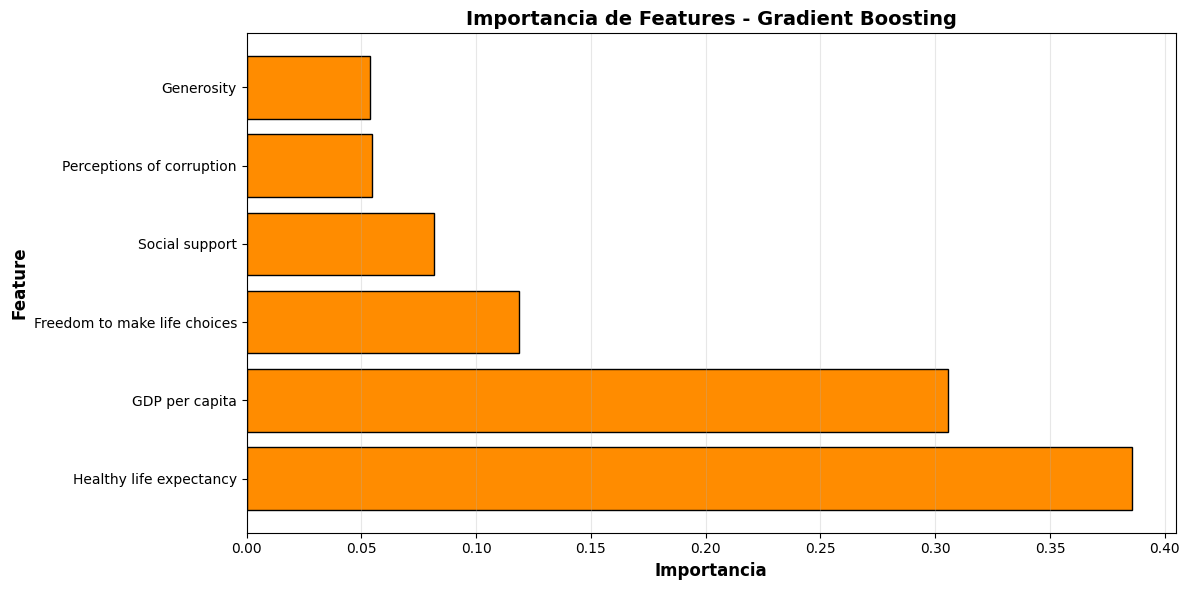

In [29]:
# Importancia de features en Gradient Boosting
importancias_gb = pd.DataFrame({
    'Feature': feature_columns,
    'Importancia': modelo_gb.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nIMPORTANCIA DE FEATURES (Gradient Boosting):")
print(importancias_gb.to_string(index=False))

# Visualizar importancias
plt.figure(figsize=(12, 6))
plt.barh(importancias_gb['Feature'], importancias_gb['Importancia'], 
         color='darkorange', edgecolor='black')
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Importancia de Features - Gradient Boosting', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [30]:
# Hacer predicciones con Gradient Boosting
y_pred_train_gb = modelo_gb.predict(X_train)
y_pred_test_gb = modelo_gb.predict(X_test)

# Calcular métricas para conjunto de entrenamiento
print("RESULTADOS EN CONJUNTO DE ENTRENAMIENTO")
metricas_train_gb = calcular_metricas(y_train, y_pred_train_gb, "Gradient Boosting (Train)")

# Calcular métricas para conjunto de prueba
print("RESULTADOS EN CONJUNTO DE PRUEBA")
metricas_test_gb = calcular_metricas(y_test, y_pred_test_gb, "Gradient Boosting (Test)")

RESULTADOS EN CONJUNTO DE ENTRENAMIENTO

MÉTRICAS DE EVALUACIÓN - Gradient Boosting (Train)
R² (Coefficient of Determination):    0.9974
MAE (Mean Absolute Error):            0.0449
MSE (Mean Squared Error):             0.0033
RMSE (Root Mean Squared Error):       0.0572
MAPE (Mean Absolute Percentage Error): 0.87%
RESULTADOS EN CONJUNTO DE PRUEBA

MÉTRICAS DE EVALUACIÓN - Gradient Boosting (Test)
R² (Coefficient of Determination):    0.7897
MAE (Mean Absolute Error):            0.3993
MSE (Mean Squared Error):             0.2626
RMSE (Root Mean Squared Error):       0.5124
MAPE (Mean Absolute Percentage Error): 7.99%


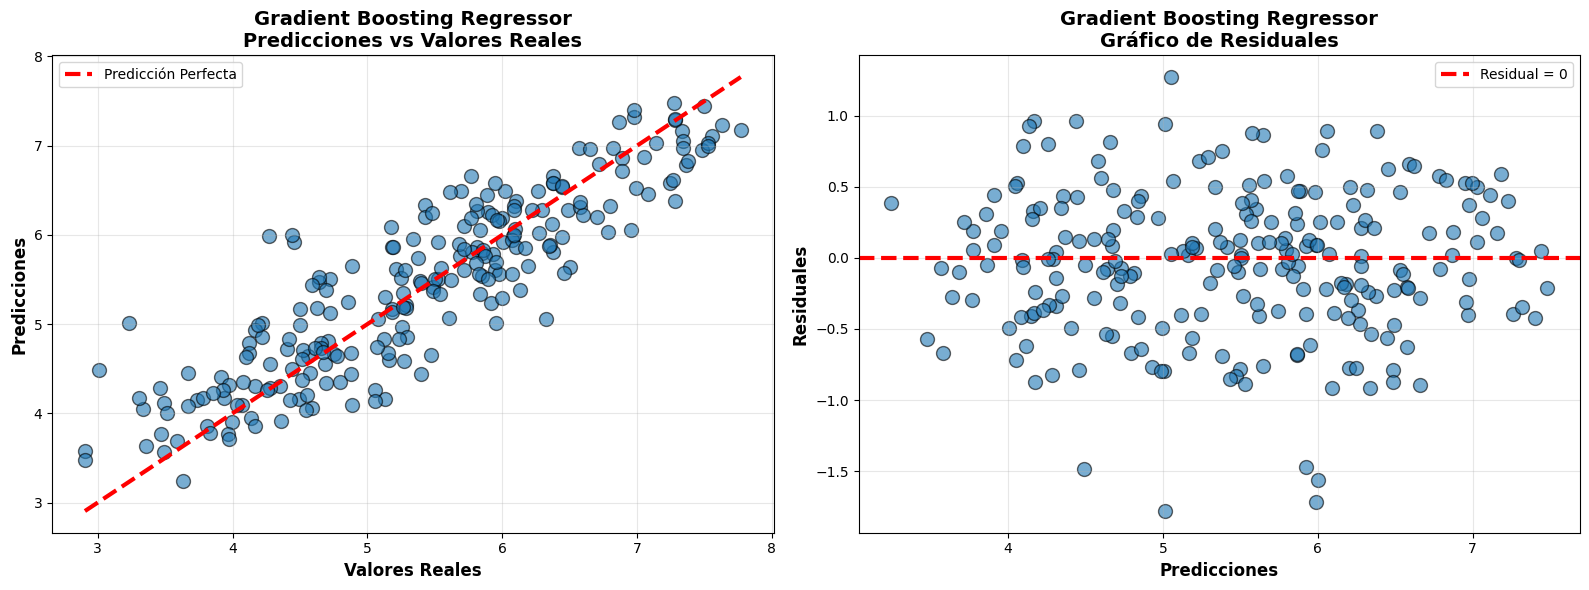

In [31]:
# Visualizar predicciones Gradient Boosting
graficar_predicciones(y_test, y_pred_test_gb, "Gradient Boosting Regressor")

In [32]:
# Cross-Validation Gradient Boosting
cv_scores_gb = cross_val_score(modelo_gb, X, y, cv=5, scoring='r2')

print("\n" + "="*80)
print("VALIDACIÓN CRUZADA (5-FOLD) - Gradient Boosting")
print("="*80)
print(f"\nR² scores por fold: {cv_scores_gb}")
print(f"R² promedio: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std() * 2:.4f})")


VALIDACIÓN CRUZADA (5-FOLD) - Gradient Boosting

R² scores por fold: [0.761122   0.70745796 0.84080098 0.84385832 0.62230836]
R² promedio: 0.7551 (+/- 0.1677)


---
## 📊 6. Comparación de Modelos

In [33]:
# Comparación de los 3 modelos

comparacion_df = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Linear Regression', 'Random Forest', 'Random Forest', 
               'Gradient Boosting', 'Gradient Boosting'],
    'Conjunto': ['Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba', 'Entrenamiento', 'Prueba'],
    'R²': [metricas_train_lr['R2'], metricas_test_lr['R2'],
           metricas_train_rf['R2'], metricas_test_rf['R2'],
           metricas_train_gb['R2'], metricas_test_gb['R2']],
    'MAE': [metricas_train_lr['MAE'], metricas_test_lr['MAE'],
            metricas_train_rf['MAE'], metricas_test_rf['MAE'],
            metricas_train_gb['MAE'], metricas_test_gb['MAE']],
    'RMSE': [metricas_train_lr['RMSE'], metricas_test_lr['RMSE'],
             metricas_train_rf['RMSE'], metricas_test_rf['RMSE'],
             metricas_train_gb['RMSE'], metricas_test_gb['RMSE']],
    'MAPE (%)': [metricas_train_lr['MAPE'], metricas_test_lr['MAPE'],
                 metricas_train_rf['MAPE'], metricas_test_rf['MAPE'],
                 metricas_train_gb['MAPE'], metricas_test_gb['MAPE']]
})

print("\n" + "="*100)
print("COMPARACIÓN DE MODELOS")
print("="*100)
print(comparacion_df.to_string(index=False))

# Resumen solo conjunto de prueba
print("\n" + "="*100)
print("RESUMEN - CONJUNTO DE PRUEBA")
print("="*100)
prueba_df = comparacion_df[comparacion_df['Conjunto'] == 'Prueba'][['Modelo', 'R²', 'MAE', 'RMSE', 'MAPE (%)']]
print(prueba_df.to_string(index=False))

# Identificar mejor modelo
mejor_r2 = prueba_df.loc[prueba_df['R²'].idxmax(), 'Modelo']
mejor_mae = prueba_df.loc[prueba_df['MAE'].idxmin(), 'Modelo']
mejor_rmse = prueba_df.loc[prueba_df['RMSE'].idxmin(), 'Modelo']

print(f"\n🏆 Mejor R² Score: {mejor_r2}")
print(f"🏆 Menor MAE: {mejor_mae}")
print(f"🏆 Menor RMSE: {mejor_rmse}")


COMPARACIÓN DE MODELOS
           Modelo      Conjunto       R²      MAE     RMSE  MAPE (%)
Linear Regression Entrenamiento 0.767534 0.422507 0.544822  8.374944
Linear Regression        Prueba 0.751880 0.432146 0.556619  8.678414
    Random Forest Entrenamiento 0.954869 0.178708 0.240056  3.550112
    Random Forest        Prueba 0.805756 0.384955 0.492495  7.764971
Gradient Boosting Entrenamiento 0.997435 0.044924 0.057229  0.874894
Gradient Boosting        Prueba 0.789725 0.399301 0.512414  7.987250

RESUMEN - CONJUNTO DE PRUEBA
           Modelo       R²      MAE     RMSE  MAPE (%)
Linear Regression 0.751880 0.432146 0.556619  8.678414
    Random Forest 0.805756 0.384955 0.492495  7.764971
Gradient Boosting 0.789725 0.399301 0.512414  7.987250

🏆 Mejor R² Score: Random Forest
🏆 Menor MAE: Random Forest
🏆 Menor RMSE: Random Forest


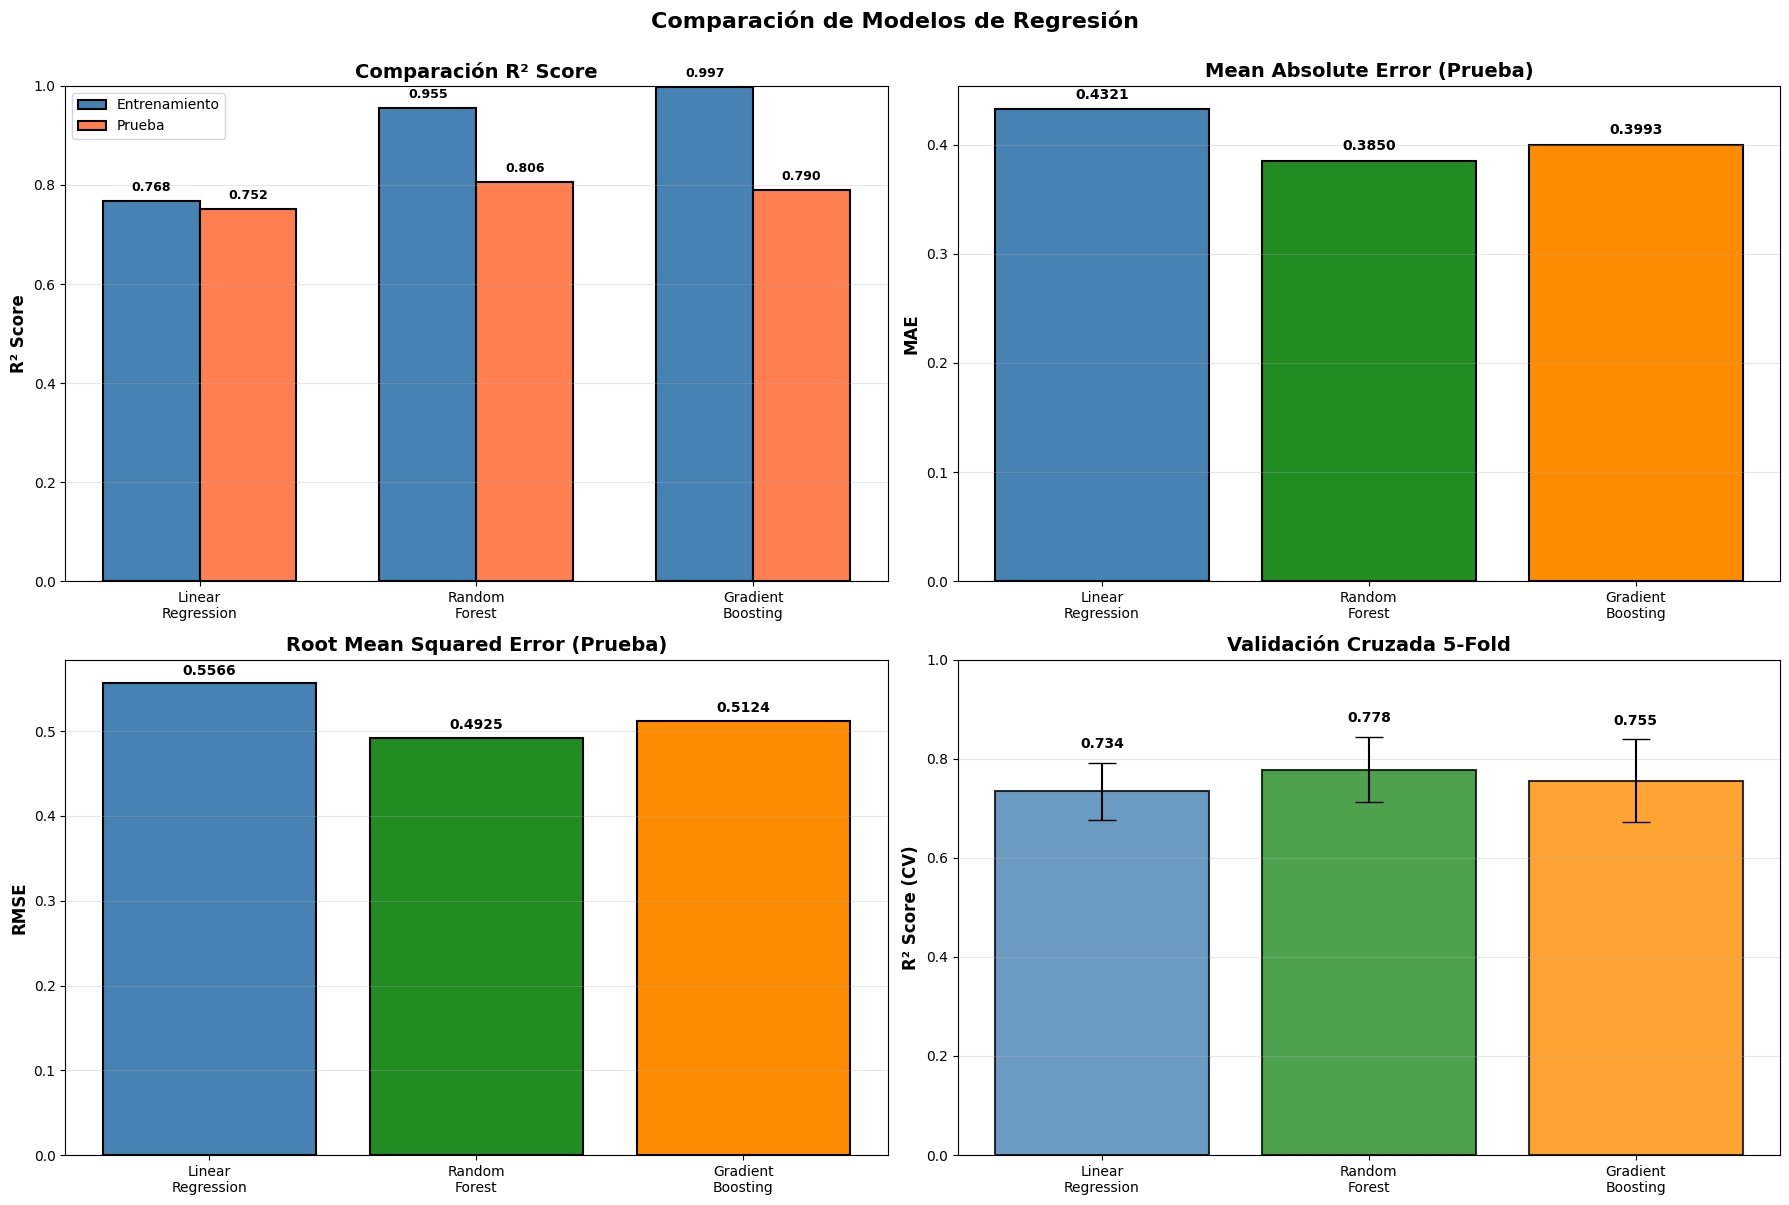

In [34]:
# Visualización comparativa de los 3 modelos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Preparar datos para gráficos
modelos = ['Linear\nRegression', 'Random\nForest', 'Gradient\nBoosting']
r2_train = [metricas_train_lr['R2'], metricas_train_rf['R2'], metricas_train_gb['R2']]
r2_test = [metricas_test_lr['R2'], metricas_test_rf['R2'], metricas_test_gb['R2']]
mae_test = [metricas_test_lr['MAE'], metricas_test_rf['MAE'], metricas_test_gb['MAE']]
rmse_test = [metricas_test_lr['RMSE'], metricas_test_rf['RMSE'], metricas_test_gb['RMSE']]

# Gráfico 1: R² Score (Train vs Test)
x = np.arange(len(modelos))
width = 0.35
axes[0, 0].bar(x - width/2, r2_train, width, label='Entrenamiento', 
               color='steelblue', edgecolor='black', linewidth=1.5)
axes[0, 0].bar(x + width/2, r2_test, width, label='Prueba', 
               color='coral', edgecolor='black', linewidth=1.5)
axes[0, 0].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Comparación R² Score', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(modelos)
axes[0, 0].legend(fontsize=10)
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(True, alpha=0.3, axis='y')
for i, (v1, v2) in enumerate(zip(r2_train, r2_test)):
    axes[0, 0].text(i - width/2, v1 + 0.02, f'{v1:.3f}', ha='center', fontweight='bold', fontsize=9)
    axes[0, 0].text(i + width/2, v2 + 0.02, f'{v2:.3f}', ha='center', fontweight='bold', fontsize=9)

# Gráfico 2: MAE
colors = ['steelblue', 'forestgreen', 'darkorange']
axes[0, 1].bar(modelos, mae_test, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_ylabel('MAE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Mean Absolute Error (Prueba)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(mae_test):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Gráfico 3: RMSE
axes[1, 0].bar(modelos, rmse_test, color=colors, edgecolor='black', linewidth=1.5)
axes[1, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Root Mean Squared Error (Prueba)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(rmse_test):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Gráfico 4: Validación Cruzada
cv_means = [cv_scores_lr.mean(), cv_scores_rf.mean(), cv_scores_gb.mean()]
cv_stds = [cv_scores_lr.std(), cv_scores_rf.std(), cv_scores_gb.std()]
axes[1, 1].bar(modelos, cv_means, yerr=cv_stds, capsize=10, 
               color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
axes[1, 1].set_ylabel('R² Score (CV)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Validación Cruzada 5-Fold', fontsize=14, fontweight='bold')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, alpha=0.3, axis='y')
for i, (v, std) in enumerate(zip(cv_means, cv_stds)):
    axes[1, 1].text(i, v + std + 0.03, f'{v:.3f}', ha='center', fontweight='bold', fontsize=10)

plt.suptitle('Comparación de Modelos de Regresión', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

---
## 📝 7. Conclusiones y Recomendaciones

In [35]:
print("="*100)
print("CONCLUSIONES - COMPARACIÓN DE MODELOS")
print("="*100)

print("\n1️⃣ REGRESIÓN LINEAL MÚLTIPLE:")
print(f"   • R² en Prueba: {metricas_test_lr['R2']:.4f} (Explica {metricas_test_lr['R2']*100:.2f}% de la variabilidad)")
print(f"   • MAE: {metricas_test_lr['MAE']:.4f} | RMSE: {metricas_test_lr['RMSE']:.4f}")
print(f"   • VENTAJAS: Modelo simple, interpretable, rápido de entrenar")
print(f"   • DESVENTAJAS: No captura relaciones no lineales complejas")

print("\n2️⃣ RANDOM FOREST REGRESSOR:")
print(f"   • R² en Prueba: {metricas_test_rf['R2']:.4f} (Explica {metricas_test_rf['R2']*100:.2f}% de la variabilidad)")
print(f"   • MAE: {metricas_test_rf['MAE']:.4f} | RMSE: {metricas_test_rf['RMSE']:.4f}")
print(f"   • VENTAJAS: Robusto a outliers, maneja relaciones no lineales, reduce overfitting")
print(f"   • DESVENTAJAS: Menos interpretable que regresión lineal")

print("\n3️⃣ GRADIENT BOOSTING REGRESSOR:")
print(f"   • R² en Prueba: {metricas_test_gb['R2']:.4f} (Explica {metricas_test_gb['R2']*100:.2f}% de la variabilidad)")
print(f"   • MAE: {metricas_test_gb['MAE']:.4f} | RMSE: {metricas_test_gb['RMSE']:.4f}")
print(f"   • VENTAJAS: Alta precisión, corrige errores secuencialmente")
print(f"   • DESVENTAJAS: Más lento de entrenar, sensible a hiperparámetros")

print("\n" + "="*100)
print("🏆 MODELO RECOMENDADO")
print("="*100)

# Determinar el mejor modelo basado en R² de prueba
modelos_dict = {
    'Linear Regression': metricas_test_lr['R2'],
    'Random Forest': metricas_test_rf['R2'],
    'Gradient Boosting': metricas_test_gb['R2']
}
mejor_modelo = max(modelos_dict, key=modelos_dict.get)

print(f"\n🎯 MEJOR MODELO: {mejor_modelo}")
print(f"\nRAZONES:")
if mejor_modelo == 'Random Forest':
    print("   ✅ Mejor R² Score en conjunto de prueba")
    print("   ✅ Robusto a outliers y datos inconsistentes (como la anomalía de 2016)")
    print("   ✅ Balance entre precisión y generalización")
    print("   ✅ Maneja relaciones no lineales entre features")
elif mejor_modelo == 'Gradient Boosting':
    print("   ✅ Mejor R² Score en conjunto de prueba")
    print("   ✅ Alta precisión predictiva")
    print("   ✅ Corrige errores de árboles anteriores")
    print("   ✅ Captura patrones complejos en los datos")
else:
    print("   ✅ Modelo simple e interpretable")
    print("   ✅ Coeficientes fáciles de explicar")
    print("   ✅ Rápido de entrenar y predecir")

print("\n" + "="*100)
print("⚠️ LIMITACIONES IDENTIFICADAS")
print("="*100)
print("\n   • Anomalía en datos de 2016: 'Social support' tiene escala diferente")
print("   • Esto afecta las predicciones para ese año específico")
print("   • Random Forest y Gradient Boosting son más robustos a estas inconsistencias")
print("   • Se recomienda investigar y corregir los datos de 2016 en futuros análisis")

CONCLUSIONES - COMPARACIÓN DE MODELOS

1️⃣ REGRESIÓN LINEAL MÚLTIPLE:
   • R² en Prueba: 0.7519 (Explica 75.19% de la variabilidad)
   • MAE: 0.4321 | RMSE: 0.5566
   • VENTAJAS: Modelo simple, interpretable, rápido de entrenar
   • DESVENTAJAS: No captura relaciones no lineales complejas

2️⃣ RANDOM FOREST REGRESSOR:
   • R² en Prueba: 0.8058 (Explica 80.58% de la variabilidad)
   • MAE: 0.3850 | RMSE: 0.4925
   • VENTAJAS: Robusto a outliers, maneja relaciones no lineales, reduce overfitting
   • DESVENTAJAS: Menos interpretable que regresión lineal

3️⃣ GRADIENT BOOSTING REGRESSOR:
   • R² en Prueba: 0.7897 (Explica 78.97% de la variabilidad)
   • MAE: 0.3993 | RMSE: 0.5124
   • VENTAJAS: Alta precisión, corrige errores secuencialmente
   • DESVENTAJAS: Más lento de entrenar, sensible a hiperparámetros

🏆 MODELO RECOMENDADO

🎯 MEJOR MODELO: Random Forest

RAZONES:
   ✅ Mejor R² Score en conjunto de prueba
   ✅ Robusto a outliers y datos inconsistentes (como la anomalía de 2016)
   ✅